In [ ]:
#import cv2
# import numpy as np
# image = cv2.imread(r'C:\Users\surface\Desktop\Python\faces\an2i\an2i_left_angry_open.pgm', -1)

# height = 0
# count = 0
# it = np.nditer(image)

# for(x) in it:
#         print(x),
#         count += 1
#         if count == 80:
#                 print(" ")
#                 count = 0

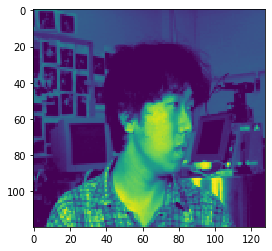

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def readpgm(name):
    with open(name) as f:

        lines = f.readlines()

    # This ignores commented lines

    for l in list(lines):

        if l[0] == '#':

            lines.remove(l)

    # here,it makes sure it is ASCII format (P2)

    assert lines[0].strip() == 'P2' 

    # Converts data to a list of integers

    data = []

    for line in lines[1:]:

        data.extend([int(c) for c in line.split()])

    return (np.array(data[3:]),(data[1],data[0]),data[2])

data = readpgm(r'C:\Users\surface\Desktop\Python\faces\an2i\an2i_left_angry_sunglasses.pgm')

plt.imshow(np.reshape(data[0],data[1])) # Usage example


In [63]:
# The first step is to build a code that reads all the images that we want. There are so many ways to do so but I've chosen
# to pick the hardest, yet intuitive one. Here I wrote a code that saves all images names in a string named "faces".
# We have 20 users with diffrent direction and moods and eyes (with or without sunglass). So by combining all the possible
# values for this 4 features, we could write all the file names that exist in our directory.

Userid = ["an2i","at33", "boland", "bpm", "ch4f", "cheyer", "choon", "danieln", "glickman", "karyadi", "kawamura", "kk49", "megak", "mitchell", "night", "phoebe", "saavik" ,"steffi", "sz24", "tammo"]
Direction =["left", "right", "straight", "up"] 
Mood = ["angry", "happy", "neutral", "sad"]
Eye= ["open", "sunglasses"]

faces = []
for user in Userid:
    for direction in Direction:
        for mood in Mood:
            for eye in Eye:
                # You should replace C:\Users\surface\Desktop\Python\faces with your directory
                faces.append(r'C:\Users\surface\Desktop\Python\faces' "\\"  + user +"\\"  + user + "_" + direction + "_" + mood +"_" + eye +".pgm" )
faces.remove(faces[193])  # These subses do not exist
faces.remove(faces[242])  # These subses do not exist
faces.remove(faces[268])  # These subses do not exist
faces.remove(faces[269])  # These subses do not exist
faces.remove(faces[295])  # These subses do not exist
faces.remove(faces[341])  # These subses do not exist
faces.remove(faces[401])  # These subses do not exist
faces.remove(faces[408])  # These subses do not exist
faces.remove(faces[417])  # These subses do not exist
faces.remove(faces[423])  # These subses do not exist
faces.remove(faces[433])  # These subses do not exist
faces.remove(faces[434])  # These subses do not exist
faces.remove(faces[468])  # These subses do not exist
faces.remove(faces[568])  # These subses do not exist
faces.remove(faces[604])  # These subses do not exist
faces.remove(faces[607])  # These subses do not exist
# faces.remove(faces[408])  # These subses do not exist
# the second step is to read data values from images. Since the images are 120 *128 pixel and we want them to represent 
# 30 *32 size images. We should read the values of the image then calculate the mean number of grey intensity for each
# 4* 4 pixels. Do u understand where this two 4 come from? Yest there are the outcomes of 120/30, and 128/32.
# also you can label teh output of a image to know what is the target. for example if my image is looking left, the
# prediction must be [0.9, 0.1, 0.1, 0.1]

import cv2
def pic_input(x):
    pic = cv2.imread(faces[x])
    picout = []
    means =[[0 for i in range(32)] for i in range(30)] 
    for m in range(30):
        for pix in range(32):
            sums=0
            for y_j in range(4*pix,4*pix+4):
                #sums += x[x_i][0][0]
                for x_i in range(4*m, 4*m+4):
                    sums += pic[x_i][y_j][0]
            zz=sums/(16*255)
            #means[m][pix] = zz
            picout.append(zz)
    if "left" in faces[x]:
         target = [0.9, 0.1, 0.1, 0.1]
    elif "right" in faces[x]:
        target = [0.1, 0.9, 0.1, 0.1]
    elif "straight" in faces[x]:
        target = [0.1, 0.1, 0.9, 0.1]  
    else:
        target = [0.1, 0.1, 0.1, 0.9]
        
    return(picout, target)

# till so we have defined a function that takes images and produce 960 grey intensity for each 4*4 pixel in original pic.
#lets test:
# d, f = pic_input(18)
# print(f)
# print(d)
len(faces)

624

In [102]:
#Now lets build the network to get a better sense
# we have 960 input nodes, 3 node in the hidden layer , and 4 output.
# I call the wights connecting the input to the hidden layer W_in, and weights connecting hidden layer to output W_h
# note that each weght, for example W_in[0], consists of all the output from this node to next layer, so W_in[0] has 3 elements.
#similarl, W_h[0] has 4 elements to represents connected lines to the output.

#            O         O         O          O
#              \    /     \   /     \     /     [ W_h[0], W_h[1], W_h[2], bo[1], bo[2], bo[3], bo[4] ]
#                O          O          O      
#                |          |          |     [ W_in[0], W_in[0], ..., W_in[959], bh[1],bh[2],bh[3] ]
#   O O O O O O O O O..... O O O O O O O O O  


# on this basis we can define our weights and biases like this:
W_in = [[np.random.rand() for i in range(960)] for j in range(3)]
bh = [np.random.rand() for j in range(3)]

W_h = [[np.random.rand() for h in range(3)] for o in range(4)]
bo = [np.random.rand() for o in range(4)]

# I  also define sigmoid function and its derivitive as below. We are going to need them alot.
import numpy as np
def sigmoid(x):
    return(1/(1+np.exp(-x)))



def sigmoid_p(x):
    return(sigmoid(x)*(1-sigmoid(x)))


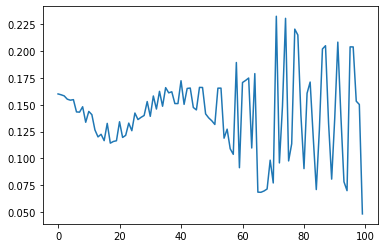

In [103]:
# Now is the time to update weights based on the samples.
out_hh = [0 for i in range(3)]
out_oo = [0 for i in range(4)] 
out_h = [0 for i in range(3)]
out_o = [0 for i in range(4)] 
cost = [0 for i in range(4)] 
z = [0 for i in range(3)]
zz = [0 for i in range(4)]
dcost_dpred = [0 for i in range(4)] 
dpred_dzz = [0 for i in range(4)]
dout_dz = [0 for i in range(3)]
dzz_dout = [0 for i in range(4)]
dzz_dbo = [1 for i in range(4)]
dz_dbh = [1 for i in range(3)]
dzz_dwh = [[0 for j in range(3)] for o in range(4)]
dz_dWi = [[0 for i in range(960)] for j in range(3)]
dzz_douth= [[0 for j in range(3)] for o in range(4)]
costmean =[]
for k in range(1000):
    costsum=0
    ri = np.random.randint(len(faces))
    X, target= pic_input(ri)
    for j in range(3):
        for i in range(960):
            out_hh[j] += W_in[j][i] *X[i]
            dz_dWi[j][i] = X[i]
        z[j] = out_hh[j] + bh[j]    
        out_h[j] = sigmoid(z[j])
        dout_dz[j] = sigmoid_p(z[j])

    for o in range(4):
        for j in range(3):
            out_oo[o] += W_h[o][j] * out_h[j]
            dzz_dwh[o][j] = out_h[j]
            dzz_douth[o][j] = W_h[o][j]

        zz[o] = out_oo[o] + bo[o] 
        out_o[o] = sigmoid(zz[o])
        cost[o] = np.square(out_o[o]-target[o])
        costsum += cost[o]  
        dcost_dpred[o] = 2*(out_o[o]-target[o])
        dpred_dzz[o] = sigmoid_p(zz[o])
        


    for o in range(4):
        for j in range(3):
            W_h[o][j] = W_h[o][j]- (learningrate * dcost_dpred[o] * dpred_dzz[o] * dzz_dwh[o][j])
        bo[o] = bo[o]- (learningrate * dcost_dpred[o] * dpred_dzz[o] * dzz_dbo[o])


    for o in range(4):
        for j in range(3):
            for i in range(960):
                W_in[j][i] = W_in[j][i]- (learningrate * dcost_dpred[o] * dpred_dzz[o] * dzz_douth[o][j] * dout_dz[j] * dz_dWi[j][i])
            bh[j] = bh[j]- (learningrate * dcost_dpred[o] * dpred_dzz[o] * dzz_douth[o][j] * dout_dz[j] * dz_dbh[j])
    

    if k % 10 == 1:
        costmean.append(costsum/4)
    
    


plt.plot(costmean)       